In [4]:
import numpy as np
import sys


In [5]:
class traj:
    def __init__(self, box_size, positions,velocities,types):
        self.box_size =box_size
        self.positions=positions
        self.velocities=velocities
        self.types=types
        


In [6]:
a=traj(box_size=1,positions=1,velocities=1,types=1)

In [7]:
def read_lammpstrj(filename,N_particles):
    f=open(filename)
    Lines=f.readlines()
    n_timestep=int(len(Lines)/(N_particles+9))
    box_size=np.zeros((n_timestep,3))
    positions=np.zeros((n_timestep,N_particles,3))
    velocities=np.zeros((n_timestep,N_particles,3))
    types=np.zeros((n_timestep,N_particles))
    count = 0

    for line in Lines:
        n_t=int(count/(N_particles+9))
        separate=line.split()
        if count%(9+N_particles)==5:
            box_size[n_t][0]=float(separate[1])-float(separate[0])
        if count%(9+N_particles)==6:
            box_size[n_t][1]=float(separate[1])-float(separate[0])
        if count%(9+N_particles)==7:
            box_size[n_t][2]=float(separate[1])-float(separate[0])
        if count%(9+N_particles)>=9:
            n_p=int(separate[0])-1
            types[n_t][n_p]=float(separate[1])
            positions[n_t][n_p][0]=float(separate[3])
            positions[n_t][n_p][1]=float(separate[4])
            positions[n_t][n_p][2]=float(separate[5])
            velocities[n_t][n_p][0]=float(separate[6])
            velocities[n_t][n_p][1]=float(separate[7])
            velocities[n_t][n_p][2]=float(separate[8])
        count+=1
    return traj(box_size=box_size,positions=positions,velocities=velocities,types=types)

In [14]:
a=read_lammpstrj('electric_field_langevin_large_small_att_se.1.lammpstrj',5200)

In [15]:
velocities=a.velocities
velocities=np.swapaxes(velocities,0,1)
xvsmall=velocities[400:5200,2000:4000,0]

In [16]:
xvsmall.mean()

0.008681030035718428

In [17]:
yvsmall=velocities[400:5200,2000:4000,1]
yvsmall.mean()

-0.00013615352550551968

In [26]:
varray=np.array(a.velocities)
varray=np.swapaxes(varray,0,1)
i=varray[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in varray:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real

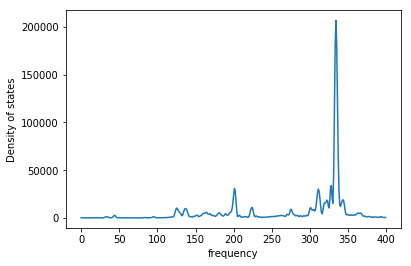

In [28]:
import matplotlib.pyplot as plt
plt.plot(PSD_sum[0:400])

plt.xlabel('frequency')
plt.ylabel('Density of states')

plt.savefig('T_1.5spring.png')

In [40]:
a=read_lammpstrj('hexagonal_spring1.5.lammpstrj',400)